# TASK1
## MOVIE GENRE CLASSIFICATION

Create a machine learning model that can predict the genre of a movie based on its plot summary or other textual information. You can use techniques like TF-IDF or word embeddings with classifiers such as **Naive Bayes, Logistic Regression**, or **Support Vector Machines**.

In [1]:
# We import all the libraries that we need in our analysis and we will import others as we need them.

import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data files 'train_data.txt'
train_data = pd.read_csv('train_data.txt', delimiter=':::', header=None, engine='python', names=['ID', 'Title', 'Genre', 'Description'])
# Remove leading and trailing whitespace from each text cell
train_data = train_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Read the data files 'test_data.txt'
test_data = pd.read_csv('test_data.txt', delimiter=':::', header=None, engine='python', names=['ID', 'Title', 'Description'])
# Remove leading and trailing whitespace from each text cell
test_data = test_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Read the data files 'test_data_solution.txt'
test_data_solution = pd.read_csv('test_data_solution.txt', delimiter=':::', header=None, engine='python', names=['ID', 'Title', 'Genre', 'Description'])
# Remove leading and trailing whitespace from each text cell
test_data_solution = test_data_solution.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

### Data Preparation

In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Download stopwords if necessary
import nltk
nltk.download('stopwords')

# Load stopwords and initialize the stemmer
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

def clean_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Convert to lowercase and remove stopwords
    text = text.lower().split()
    text = [word for word in text if word not in stop_words]
    
    # Stemming of words
    text = [stemmer.stem(word) for word in text]
    
    return ' '.join(text)

train_data['cleaned_description'] = train_data['Description'].apply(clean_text)
test_data['cleaned_description'] = test_data['Description'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ecast\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Transform texts to TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['cleaned_description'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['cleaned_description'])

y_train = train_data['Genre']

### Exploratory Data Analysis

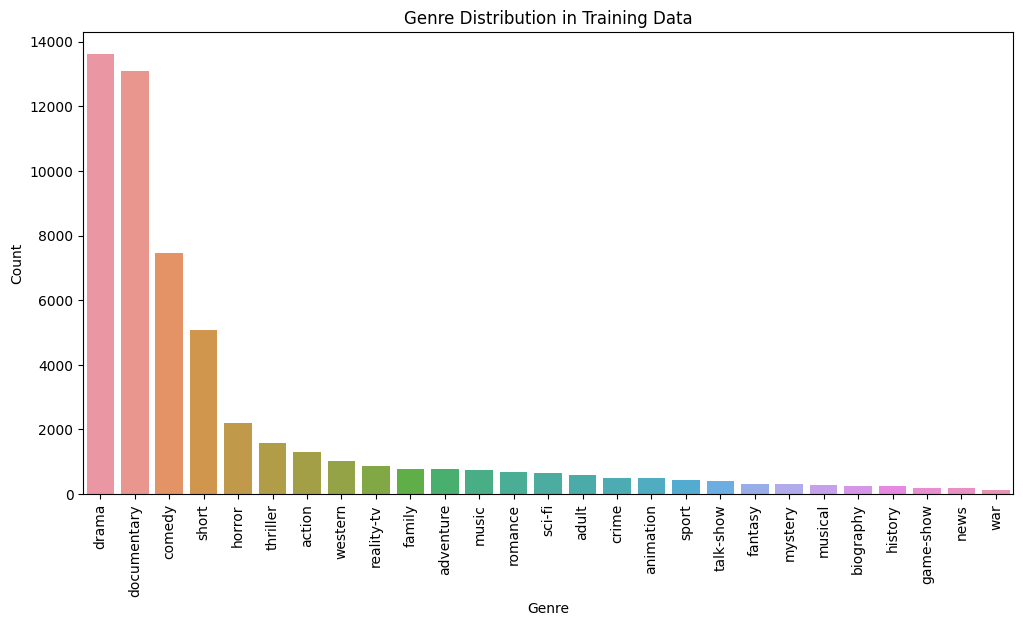

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each genre
genre_counts = y_train.value_counts()

# Plot the genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Distribution in Training Data')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Train-Validation Split

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

### Model Training and Evaluation - Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the model with the training split
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train_split, y_train_split)

# Evaluate the model on the validation set
val_predictions = best_model.predict(X_val_split)
print("Evaluation on the Validation Set:")
print(f"Accuracy: {accuracy_score(y_val_split, val_predictions)}")
print(classification_report(y_val_split, val_predictions))

# Train the model with the full training data
best_model.fit(X_train_tfidf, y_train)

Evaluation on the Validation Set:
Accuracy: 0.5828645208890528
              precision    recall  f1-score   support

      action       0.51      0.28      0.36       263
       adult       0.81      0.27      0.40       112
   adventure       0.40      0.14      0.20       139
   animation       0.48      0.12      0.20       104
   biography       0.00      0.00      0.00        61
      comedy       0.52      0.60      0.56      1443
       crime       0.30      0.03      0.05       107
 documentary       0.67      0.84      0.75      2659
       drama       0.55      0.77      0.64      2697
      family       0.44      0.11      0.17       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.89      0.42      0.58        40
     history       0.00      0.00      0.00        45
      horror       0.64      0.60      0.62       431
       music       0.64      0.49      0.55       144
     musical       1.00      0.02      0.04        50
     mystery      

LogisticRegression(max_iter=1000)

### Prediction and Evaluation on the Test Set

In [8]:
# Predict genres for the test set
test_predictions = best_model.predict(X_test_tfidf)

# Compare the predictions with the ground truth
y_test_true = test_data_solution['Genre']
print(f"Accuracy on the Test Set: {accuracy_score(y_test_true, test_predictions)}")
print(classification_report(y_test_true, test_predictions))

Accuracy on the Test Set: 0.5871586715867159
              precision    recall  f1-score   support

      action       0.48      0.31      0.38      1314
       adult       0.62      0.27      0.37       590
   adventure       0.59      0.18      0.28       775
   animation       0.51      0.09      0.15       498
   biography       0.00      0.00      0.00       264
      comedy       0.54      0.60      0.57      7446
       crime       0.31      0.04      0.07       505
 documentary       0.67      0.84      0.75     13096
       drama       0.55      0.77      0.64     13612
      family       0.46      0.09      0.15       783
     fantasy       0.44      0.05      0.09       322
   game-show       0.89      0.53      0.67       193
     history       1.00      0.00      0.01       243
      horror       0.66      0.60      0.63      2204
       music       0.63      0.46      0.53       731
     musical       0.21      0.01      0.02       276
     mystery       0.38      0.02   

### Conclusion

The F1-score varies significantly across genres. For example, genres like drama and documentary have relatively high F1-scores, while genres like biography and fantasy have very low or even zero F1-scores. This suggest the model performs well for some common genres but struggles with less represented or more complex genres.


Precision and recall are also highly variable. Genres such as documentary have a good balance between precision and recall, whereas other genres like romance and thgiller have los values in both metrics.